In [19]:
import sys

import os
import glob

import numpy as np

from astropy.io import fits

import matplotlib.pyplot as plt

sys.path.append(os.path.abspath('..'))

from mrileyowens.stats import weighted_quantile

In [ ]:
def compare():

    home = os.getcwd()
    data = f'{home}/data'
    results = f'{home}/results'

    files = glob.glob(f'{results}/beagle_fits/JADES_z6to9LBGcatalog_Endsley2024_f775w_dropouts_beagle_csfh_fits/*_GOODS*_BEAGLE.fits.gz')

    catalog = f'{data}/JADES_z6to9LBGcatalog_Endsley2024_f775w_dropouts.fits'
    hdul_endsley2024 = fits.open(catalog)

    ids_endsley2024 = hdul_endsley2024[1].data['ID']

    print(fits.open(catalog)[1].data.columns.names)

    keys = [['GALAXY PROPERTIES','redshift','zphot'], ['GALAXY PROPERTIES','M_tot','logM_CSFH'], ['STAR FORMATION', 'max_stellar_age', 'logAge']]
    labels = [r'$z_\text{phot}$', r'log$_{10}\left(M_\star / M_\odot\right)$', r'log$_{10}(\text{Age}/\text{yr})$']

    for i, pair in enumerate(keys):

        fig, ax = plt.subplots()

        for file in files:

            hdul = fits.open(file)

            id = os.path.basename(file).split('_BEAGLE')[0]

            #print(id, ids_endsley2024)
            idx = np.where(ids_endsley2024 == id)

            me_posterior = hdul[pair[0]].data[pair[1]]
            probs = hdul['POSTERIOR PDF'].data['probability']

            me_posterior = np.log10(me_posterior) if 'log' in pair[2] else me_posterior

            me, me_lower, me_upper = weighted_quantile(me_posterior, probs, [0.5, 0.16, 0.84])

            endsley2024, endsley2024_lower, endsley2024_upper = hdul_endsley2024[1].data[pair[2]][idx][0], hdul_endsley2024[1].data[f'{pair[2]}_l16'][idx][0], hdul_endsley2024[1].data[f'{pair[2]}_u84'][idx][0]

            #print(endsley2024, endsley2024_lower, endsley2024_upper)

            ax.errorbar(me, endsley2024, xerr=[[me - me_lower], [me_upper - me]], yerr=[[endsley2024 - endsley2024_lower], [endsley2024_upper - endsley2024]], color='black')

        ax.set_xlabel(f'{labels[i]} (Me)')
        ax.set_ylabel(f'{labels[i]} (Endsley et al. (2024))')

        # Create a one-to-one line on the figure
        ax.axline((7,7), slope=1, color='red', linestyle='dashed')

['ID', 'dropoutType', 'multiComponentFlag', 'RA', 'Dec', 'zphot', 'zphot_l16', 'zphot_u84', 'Muv', 'Muv_l16', 'Muv_u84', 'logM', 'logM_l16', 'logM_u84', 'OIIIHbEW', 'OIIIHbEW_l16', 'OIIIHbEW_u84', 'HaEW', 'HaEW_l16', 'HaEW_u84', 'Av', 'Av_l16', 'Av_u84', 'BBrat', 'BBrat_l16', 'BBrat_u84', 'logZ', 'logZ_l16', 'logZ_u84', 'logXiIon', 'logXiIon_l16', 'logXiIon_u84', 'logAge', 'logAge_l16', 'logAge_u84', 'logM_CSFH', 'logM_CSFH_l16', 'logM_CSFH_u84', 'logM_bursty', 'logM_bursty_l16', 'logM_bursty_u84', 'logM_continuity', 'logM_continuity_l16', 'logM_continuity_u84', 'ACS_F435W', 'ACS_F435W_err', 'ACS_F606W', 'ACS_F606W_err', 'ACS_F775W', 'ACS_F775W_err', 'ACS_F814W', 'ACS_F814W_err', 'ACS_F850LP', 'ACS_F850LP_err', 'NRC_F090W', 'NRC_F090W_err', 'NRC_F115W', 'NRC_F115W_err', 'NRC_F150W', 'NRC_F150W_err', 'NRC_F200W', 'NRC_F200W_err', 'NRC_F277W', 'NRC_F277W_err', 'NRC_F335M', 'NRC_F335M_err', 'NRC_F356W', 'NRC_F356W_err', 'NRC_F410M', 'NRC_F410M_err', 'NRC_F444W', 'NRC_F444W_err']


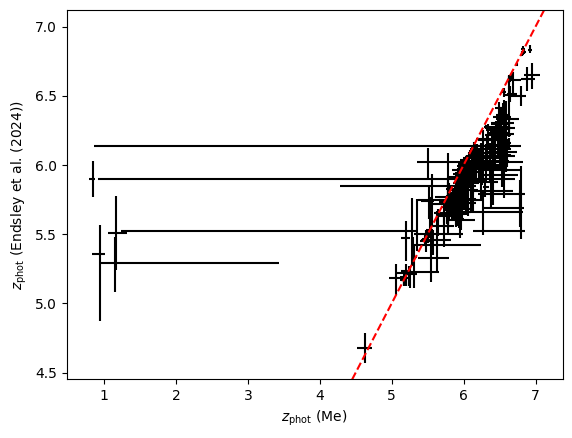

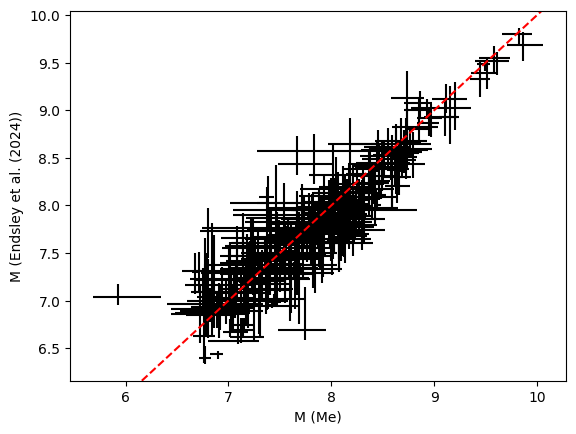

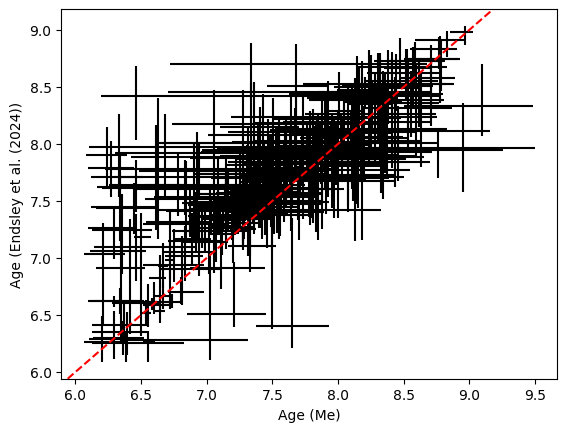

In [55]:
compare()